# Comparative Analysis
In this notebook, we compare ClaSS with different competitors regarding scalability.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm
from scipy import stats

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts
from src.utils import load_combined_dataset, load_benchmark_dataset
from src.clazz.window_size import suss

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

In [5]:
df_comb = load_benchmark_dataset()
df_comb['window_size'] = df_comb.time_series.apply(lambda ts: np.int64(suss(ts[:10_000])))
df_comb['ts_len'] = df_comb.time_series.apply(len)
df_comb

,name,window_size,change_points,time_series,ts_len
0,Adiac,22,"[572, 1012, 1232]","[1.681146, 1.383394, 1.029389, 0.688386, 0.354...",1408
1,ArrowHead,32,[753],"[-1.957721, -1.858082, -1.657983, -1.420794, -...",1506
2,Beef,66,[705],"[-0.380818, -0.352238, -0.295392, -0.225041, -...",1410
3,BeetleFly,34,[1280],"[1.114805, 0.774403, 0.477129, 0.115781, -0.24...",2560
4,BirdChicken,48,[1280],"[1.697714, 1.439032, 1.22287, 0.99708, 0.76479...",2560
5,CBF,36,"[384, 704]","[-1.27713, -0.689811, -0.901181, -0.937038, -0...",960
6,Cane,94,[2345],"[-0.3205028, -0.37070978, -0.393024, -0.252165...",5340
7,Car,24,"[577, 1154, 1550]","[1.451648, 1.030174, 0.531853, 0.040229, -0.40...",2163
8,Chinatown,24,[],"[0.025935, -0.435655, -0.608168, -0.81565, -1....",240
9,ChlorineConcentration,36,[2365],"[2.496227, 1.046743, 0.391124, 0.607525, -0.22...",7801


Let's load the scores from the different methods.

In [6]:
competitors = ["ClaSS", "FLOSS", "Window"] # "BOCD", 
datasets = ["UTSA", "TSSB"] # , "PAMAP", "mHealth", "WESAD", "MIT-BIH-VE", "MIT-BIH-Arr"
methods, dfs = list(), list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in tqdm(enumerate(methods)):
    df = []
    
    for d in datasets:
        try:
            tmp = pd.read_csv(f"../experiments/competitor_{d}/{file_name}")[["dataset", eval_score, "runtimes"]]
        except FileNotFoundError:
            tmp = pd.read_csv(f"../experiments/competitor_{d}/{file_name}.gz", compression="gzip")[["dataset", eval_score, "runtimes"]]
        
        tmp["name"] = d
        df.append(tmp)
        
    df = pd.concat(df)    
    df.sort_values(by="dataset", inplace=True)
    df.reset_index(drop=True, inplace=True)
    dfs.append((name, df))
   
df_runtimes = pd.DataFrame()
df_throughput = pd.DataFrame()
df_scores = pd.DataFrame()

for name, df in dfs:
    runtimes = df["runtimes"].apply(eval).apply(np.sum)
    
    df_runtimes["name"] = df["name"]
    df_runtimes["dataset"] = df.dataset
    df_runtimes[name] = runtimes
    
    df_throughput["name"] = df["name"]
    df_throughput["dataset"] = df.dataset
    df_throughput[name] = (df_comb.ts_len / runtimes)

    df_scores["name"] = df["name"]
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
idx_sizes = np.argsort(df_comb.ts_len).to_numpy()
df_throughput

3it [00:00,  5.92it/s]


,name,dataset,ClaSS,FLOSS,Window
0,TSSB,Adiac,352.335600,50.770061,1017.105871
1,TSSB,ArrowHead,359.899630,51.079972,1335.141892
2,TSSB,Beef,364.780330,51.054271,1750.661154
3,TSSB,BeetleFly,444.805849,89.825633,1084.750359
4,TSSB,BirdChicken,417.501806,88.328859,1262.489274
5,TSSB,CBF,281.633120,34.175352,1551.991723
6,UTSA,Cane,287.352765,258.648749,1445.759647
7,TSSB,Car,429.516927,73.272904,1234.215677
8,TSSB,Chinatown,1040.267002,99.915904,2016.806723
9,TSSB,ChlorineConcentration,444.917188,248.741386,1220.636120


Let's calculate the sum/mean/std score.

In [7]:
df_runtimes.iloc[:,2:].sum(axis=0) / 60

ClaSS     31.816874
FLOSS     61.341365
Window    10.576352
dtype: float64

In [8]:
df_throughput.mean(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3685/2575769137.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_throughput.mean(axis=0)


ClaSS      452.242565
FLOSS      367.574505
Window    1256.238643
dtype: float64

In [9]:
df_throughput.std(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3685/676843339.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_throughput.std(axis=0)


ClaSS     148.463920
FLOSS     508.866984
Window    147.392931
dtype: float64

Let's compute the wins per method.

In [10]:
ranks = df_runtimes.rank(1, method = 'min', ascending=True)
means = np.array(ranks.mean(axis=0))

In [11]:
for mean, name in zip(means, df_runtimes.columns[2:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ClaSS:wins=0 rank=2.14019
FLOSS:wins=10 rank=2.76636
Window:wins=97 rank=1.09346


Let's plot and output the ranks.

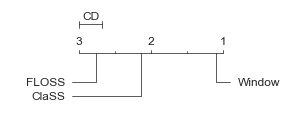

In [12]:
cd = Orange.evaluation.scoring.compute_CD(means, df_runtimes.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_runtimes.columns[2:], cd=cd, width=4, reverse=True, textspace=1, filename=f"../figures/cd_runtime.pdf")

Let's compute wins/losses against ClaSS.

In [13]:
selection = "ClaSS"

for rival in df_runtimes.columns[2:]:
    if rival == selection: continue
    
    df_pair = df_runtimes[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs FLOSS: (wins/ties/losses): 92/0/15
ClaSS vs Window: (wins/ties/losses): 0/0/107


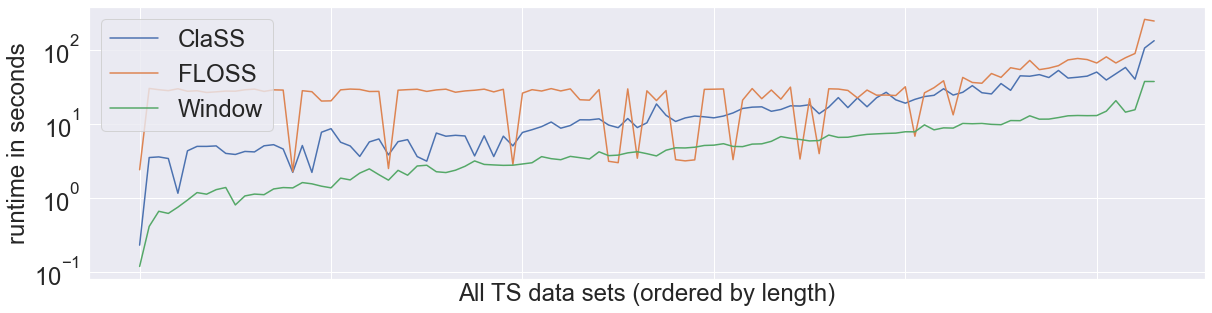

In [14]:
fontsize = 24
_, ax  = plt.subplots(1, figsize=(20,5))

for name in df_runtimes.columns[2:]:
    ax.plot(df_runtimes[name].to_numpy()[idx_sizes], label=name)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.tick_params(
    axis='x',          
    which='both',      
    labelbottom=False,
    labelleft=False
)
ax.legend(loc=2, prop={'size': fontsize})
ax.set_xlabel("All TS data sets (ordered by length)", fontsize=fontsize)
ax.set_ylabel("runtime in seconds", fontsize=fontsize)

ax.set_yscale('log')

names = df_runtimes.name.to_numpy().tolist()      
names = np.array(names)[idx_sizes]

plt.savefig(f"../figures/runtime.pdf", bbox_inches="tight")

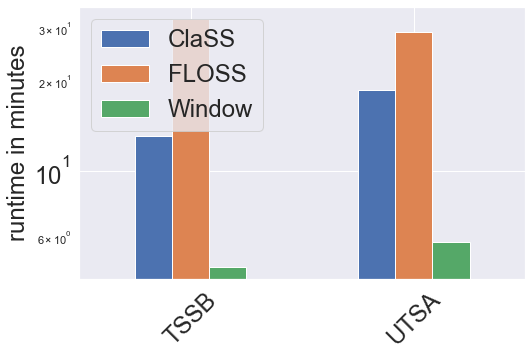

In [33]:
fontsize = 24

ax = df_runtimes.groupby("name").sum().apply(lambda x: x / 60).plot(kind="bar", figsize=(8,5), rot=45, sort_columns=True)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)


ax.set_yscale('log')

ax.legend(prop={'size': fontsize})
ax.set_xlabel("", fontsize=fontsize)
ax.set_ylabel("runtime in minutes", fontsize=fontsize)


plt.savefig(f"../figures/bar_runtime.pdf", bbox_inches="tight")

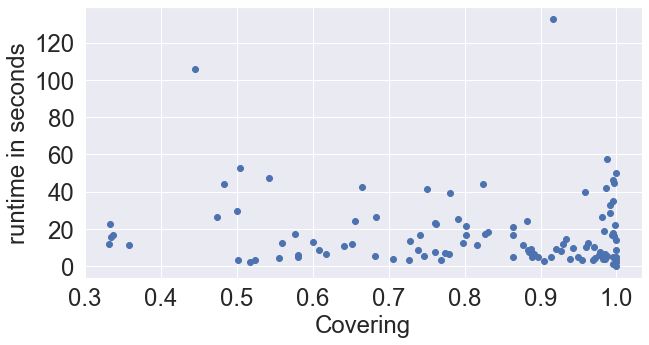

In [16]:
fontsize = 24

_, ax = plt.subplots(1, figsize=(10,5))
ax.scatter(df_scores.ClaSS, df_runtimes.ClaSS)
ax.set_xlabel("Covering", fontsize=fontsize)
ax.set_ylabel("runtime in seconds", fontsize=fontsize)

# ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../figures/runtime_covering.pdf", bbox_inches="tight")

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr = LinearRegression().fit(df_comb.ts_len.to_numpy().reshape(-1,1), df_runtimes.ClaSS.to_numpy().reshape(-1,1))
y_min, y_max = lr.predict(np.array([df_comb.ts_len.min(), df_comb.ts_len.max()]).reshape(-1,1)).flatten()

print(f"Mean absolute error: {np.round(mean_absolute_error(df_runtimes.ClaSS.to_numpy(), lr.predict(df_comb.ts_len.to_numpy().reshape(-1,1)).flatten()), 3)} seconds")

Mean absolute error: 3.111 seconds


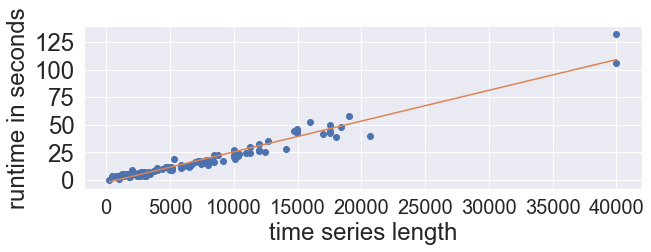

In [53]:
fontsize = 24

_, ax = plt.subplots(1, figsize=(10,3))
ax.scatter(df_comb.ts_len, df_runtimes.ClaSS)

ax.plot([df_comb.ts_len.min(), df_comb.ts_len.max()], [y_min, y_max], c="C1")

# ax.set_yscale('log')

ax.set_xlabel("time series length", fontsize=24)
ax.set_ylabel("runtime in seconds", fontsize=24)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../figures/runtime_length.pdf", bbox_inches="tight")

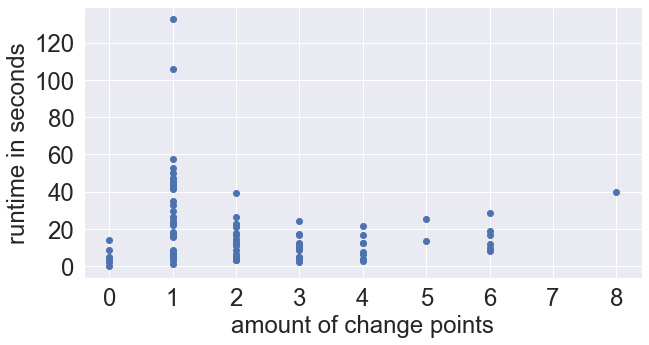

In [18]:
fontsize = 24

_, ax = plt.subplots(1, figsize=(10,5))
ax.scatter(df_comb["change_points"].apply(len), df_runtimes.ClaSS)
ax.set_xlabel("amount of change points", fontsize=24)
ax.set_ylabel("runtime in seconds", fontsize=24)

# ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../figures/runtime_cps.pdf", bbox_inches="tight")

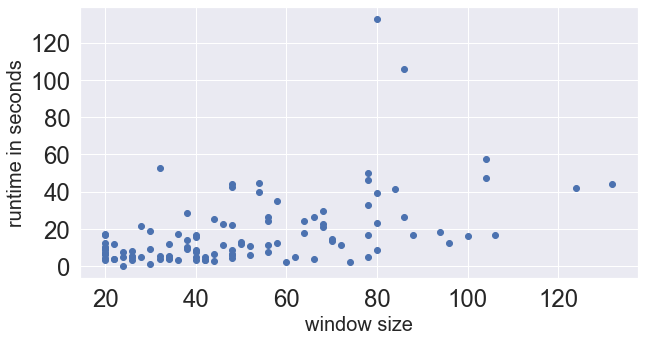

In [19]:
fontsize = 24

_, ax = plt.subplots(1, figsize=(10,5))
ax.scatter(df_comb.window_size, df_runtimes.ClaSS)
ax.set_xlabel("window size", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

# ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../figures/runtime_window.pdf", bbox_inches="tight")

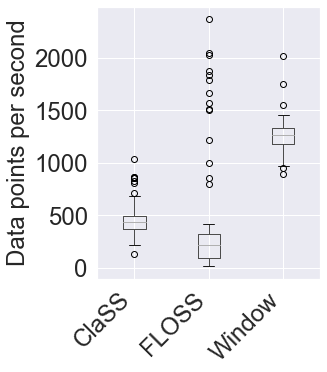

In [32]:
fontsize = 24
_, ax = plt.subplots(figsize=(4,5))

df_throughput.boxplot(ax=ax, rot=90)
ax.set_ylabel("Data points per second", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.set_xticklabels(df_scores.columns[2:], rotation=45, ha="right")
plt.savefig(f"../figures/bp_throughput.pdf", bbox_inches="tight") 